# WINE Dataset

In [1]:
from sklearn.datasets import load_wine
from sklearn.tree import DecisionTreeClassifier

wine = load_wine()



In [2]:
wine.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names'])

In [3]:
wine['feature_names']

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

In [4]:
wine['target_names']

array(['class_0', 'class_1', 'class_2'], dtype='<U7')

In [5]:
import pandas as pd
import numpy as np

df = pd.DataFrame(data= np.c_[wine['data'], wine['target']],
                     columns= wine['feature_names'] + ['target'])



df.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,0.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,0.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,0.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,1.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,2.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,2.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
 13  targe

In [7]:
df.groupby(['target'])['target'].count()

target
0.0    59
1.0    71
2.0    48
Name: target, dtype: int64

In [8]:
from sklearn.model_selection import train_test_split

#Train test split
X_train, X_test, y_train, y_test = train_test_split(wine['data'], wine['target'], test_size=0.2, shuffle=True, random_state=3)

### Support Vector Machine

### Senza scalare

In [9]:
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

svm_clf_pure = SVC()
svm_clf_pure.fit(X_train, y_train)

SVC()

In [11]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(svm_clf_pure, X_train, y_train, cv = 10, scoring = "accuracy")
print(scores)
print("Mean %0.2f"%scores.mean())
print("Dev %0.2f"%scores.std())

[0.73333333 0.73333333 0.85714286 0.57142857 0.57142857 0.78571429
 0.78571429 0.71428571 0.57142857 0.71428571]
Mean 0.70
Dev 0.10


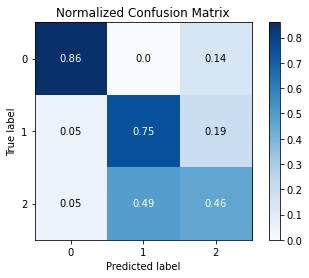

In [12]:
import scikitplot as skplt

skplt.metrics.plot_confusion_matrix(y_train, svm_clf_pure.predict(X_train), normalize=True)

### Usando una pipeline con uno StandardScaler

In [13]:
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

svm_clf = make_pipeline(StandardScaler(), SVC())
svm_clf.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()), ('svc', SVC())])

In [14]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(svm_clf, X_train, y_train, cv = 10, scoring = "accuracy")
print(scores)
print("Mean %0.2f"%scores.mean())
print("Dev %0.2f"%scores.std())

[1.         1.         0.92857143 1.         1.         0.92857143
 1.         1.         1.         1.        ]
Mean 0.99
Dev 0.03


In [ ]:
y_pred = svm_clf.predict(X_train)

In [ ]:
import scikitplot as skplt

skplt.metrics.plot_confusion_matrix(y_train, y_pred, normalize=True)

### Decision Tree

In [15]:
from sklearn.tree import DecisionTreeClassifier

tree_clf = DecisionTreeClassifier()
tree_clf.fit(X_train,y_train)

DecisionTreeClassifier()

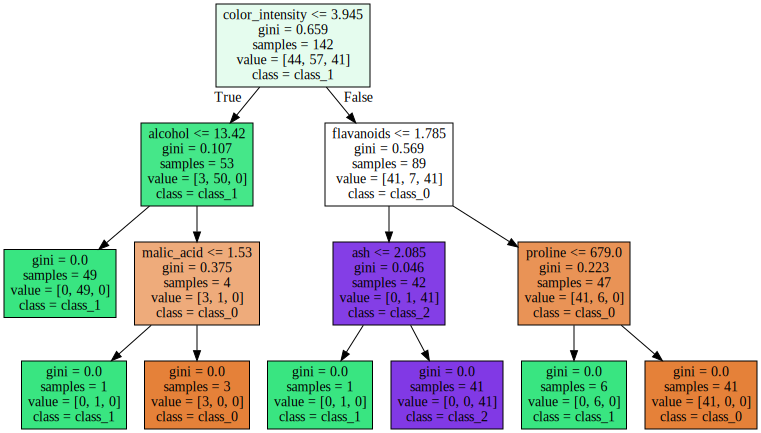

In [16]:
from sklearn.tree import export_graphviz 
import os
import graphviz

dot_data = export_graphviz(tree_clf, out_file=None, 
                      feature_names=wine.feature_names,  
                      class_names=wine.target_names,  
                      filled=True)  
graph = graphviz.Source(dot_data)  
graph 

In [17]:
tree_clf.feature_importances_

array([0.04442575, 0.01601745, 0.0208481 , 0.        , 0.        ,
       0.        , 0.4084843 , 0.        , 0.        , 0.39844308,
       0.        , 0.        , 0.11178133])

In [18]:
wine['feature_names']

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

In [20]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_clf, X_train, y_train, cv = 10, scoring = "accuracy")
print(scores)
print("Mean %0.2f"%scores.mean())
print("Dev %0.2f"%scores.std())

[1.         0.8        0.85714286 0.92857143 0.78571429 1.
 0.92857143 0.85714286 1.         0.85714286]
Mean 0.90
Dev 0.08


In [21]:
from sklearn.tree import DecisionTreeClassifier

tree_clf_depth_2 = DecisionTreeClassifier(max_depth = 2)
tree_clf_depth_2.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=2)

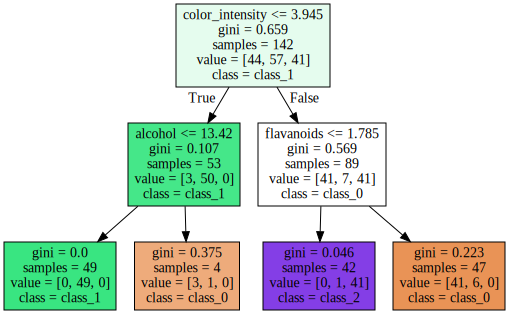

In [22]:
from sklearn.tree import export_graphviz 
import os
import graphviz

dot_data = export_graphviz(tree_clf_depth_2, out_file=None, 
                      feature_names=wine.feature_names,  
                      class_names=wine.target_names,  
                      filled=True)  
graph = graphviz.Source(dot_data)  
graph 

In [23]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_clf_depth_2, X_train, y_train, cv = 3, scoring = "accuracy")
print(scores)
print("Mean %0.2f"%scores.mean())
print("Dev %0.2f"%scores.std())

[0.85416667 0.93617021 0.82978723]
Mean 0.87
Dev 0.05


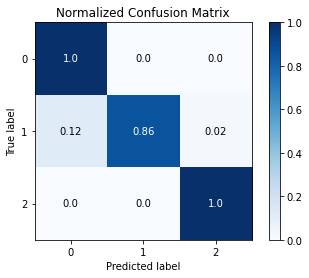

In [24]:
import scikitplot as skplt

skplt.metrics.plot_confusion_matrix(y_train, tree_clf_depth_2.predict(X_train), normalize=True)

## Come migliorare il modello?

In [25]:
svc = make_pipeline(StandardScaler(), SVC())
svc.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'standardscaler', 'svc', 'standardscaler__copy', 'standardscaler__with_mean', 'standardscaler__with_std', 'svc__C', 'svc__break_ties', 'svc__cache_size', 'svc__class_weight', 'svc__coef0', 'svc__decision_function_shape', 'svc__degree', 'svc__gamma', 'svc__kernel', 'svc__max_iter', 'svc__probability', 'svc__random_state', 'svc__shrinking', 'svc__tol', 'svc__verbose'])

In [33]:
from sklearn.model_selection import GridSearchCV

param_grid = [{'svc__C' : [0.1, 1, 10, 100], 'svc__kernel' : ['linear','rbf']},
              {'svc__C' : [0.1, 1, 10, 100], 'svc__kernel' : ['poly'], 'svc__degree': [2,3]}]


grid_search = GridSearchCV(svc, param_grid, cv = 10, scoring = 'accuracy', return_train_score = True)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('svc', SVC())]),
             param_grid=[{'svc__C': [0.1, 1, 10, 100],
                          'svc__kernel': ['linear', 'rbf']},
                         {'svc__C': [0.1, 1, 10, 100], 'svc__degree': [2, 3],
                          'svc__kernel': ['poly']}],
             return_train_score=True, scoring='accuracy')

In [27]:
grid_search.best_params_

{'svc__C': 0.1, 'svc__kernel': 'linear'}

In [28]:
svc_best = grid_search.best_estimator_

In [37]:
from sklearn.model_selection import cross_validate

scores = cross_validate(svc_best, X_train, y_train, cv = 3, scoring = ["accuracy","precision","recall"], average = 'weighted')
print(scores)
print("Mean %0.2f"%scores.mean())
print("Dev %0.2f"%scores.std())

TypeError: cross_validate() got an unexpected keyword argument 'average'

In [30]:
cvresult = grid_search.cv_results_

for mean_score, params in zip(cvresult['mean_test_score'], cvresult['params']):
    print(mean_score, params)

0.9928571428571429 {'svc__C': 0.1, 'svc__kernel': 'linear'}
0.9861904761904763 {'svc__C': 0.1, 'svc__kernel': 'rbf'}
0.9857142857142858 {'svc__C': 1, 'svc__kernel': 'linear'}
0.9857142857142858 {'svc__C': 1, 'svc__kernel': 'rbf'}
0.9857142857142858 {'svc__C': 10, 'svc__kernel': 'linear'}
0.9928571428571429 {'svc__C': 10, 'svc__kernel': 'rbf'}
0.9857142857142858 {'svc__C': 100, 'svc__kernel': 'linear'}
0.9928571428571429 {'svc__C': 100, 'svc__kernel': 'rbf'}
0.7180952380952382 {'svc__C': 0.1, 'svc__degree': 2, 'svc__kernel': 'poly'}
0.7257142857142858 {'svc__C': 0.1, 'svc__degree': 3, 'svc__kernel': 'poly'}
0.9152380952380954 {'svc__C': 1, 'svc__degree': 2, 'svc__kernel': 'poly'}
0.9580952380952381 {'svc__C': 1, 'svc__degree': 3, 'svc__kernel': 'poly'}
0.8942857142857144 {'svc__C': 10, 'svc__degree': 2, 'svc__kernel': 'poly'}
0.9504761904761905 {'svc__C': 10, 'svc__degree': 3, 'svc__kernel': 'poly'}
0.8871428571428572 {'svc__C': 100, 'svc__degree': 2, 'svc__kernel': 'poly'}
0.9647619047

In [31]:
y_pred_final = svc_best.predict(X_test)

In [32]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred_final)

0.9722222222222222